In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D, LeakyReLU
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [2]:
def make_adam_opt(alpha =0.001, beta1=0.9, beta2 = 0.999):
    return tf.keras.optimizers.Adam(learning_rate=alpha, beta_1=beta1, beta_2=beta2)

In [3]:
def make_const_opt(alpha =0.001):
    return tf.keras.optimizers.SGD(learning_rate=alpha)

In [4]:
# the data, split between train and test sets
# url = 'https://storage.googleapis.com/tensorflow/tf-keras-datasets/cifar10.npz'
# (x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data(url)
# n=5000
# x_train = x_train[1:n]; y_train=y_train[1:n]


In [5]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
n=5000
x_train = x_train[1:n]; y_train=y_train[1:n]

In [6]:
# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
print("orig x_train shape:", x_train.shape)

orig x_train shape: (4999, 32, 32, 3)


In [7]:
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [8]:
input_shape = (32, 32, 3)

In [9]:
# model = keras.Sequential()
# model.add(Conv2D(16, (3,3), padding='same', input_shape=x_train.shape[1:],activation='relu'))
# model.add(Conv2D(16, (3,3), strides=(2,2), padding='same', activation='relu'))
# model.add(Conv2D(32, (3,3), padding='same', activation='relu'))
# model.add(Conv2D(32, (3,3), strides=(2,2), padding='same', activation='relu'))
# model.add(Dropout(0.5))
# model.add(Flatten())
# model.add(Dense(num_classes, activation='softmax',kernel_regularizer=regularizers.l1(0.0001)))
# model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])
# model.summary()

# batch_size = 128
# epochs = 20
# history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)
# model.save("cifar.model")
# plt.subplot(211)
# plt.plot(history.history['accuracy'])
# plt.plot(history.history['val_accuracy'])
# plt.title('model accuracy')
# plt.ylabel('accuracy')
# plt.xlabel('epoch')
# plt.legend(['train', 'val'], loc='upper left')
# plt.subplot(212)
# plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
# plt.title('model loss')
# plt.ylabel('loss'); plt.xlabel('epoch')
# plt.legend(['train', 'val'], loc='upper left')
# plt.show()

In [10]:
def run_experiment(opt, epochs):
    model = keras.Sequential()
    model.add(Conv2D(16, (3,3), padding='same', input_shape=x_train.shape[1:],activation='relu'))
    model.add(Conv2D(16, (3,3), strides=(2,2), padding='same', activation='relu'))
    model.add(Conv2D(32, (3,3), padding='same', activation='relu'))
    model.add(Conv2D(32, (3,3), strides=(2,2), padding='same', activation='relu'))
    model.add(Dropout(0.5))
    model.add(Flatten())
    model.add(Dense(num_classes, activation='softmax',kernel_regularizer=regularizers.l1(0.0001)))
    model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])
    # model.summary()

    batch_size = 128
    epochs = epochs
    history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)
    return history.history['val_accuracy'], history.history['val_loss'], history.history['accuracy'], history.history['loss'] 

In [11]:
run1 = run_experiment(make_const_opt(alpha = 0.1), 50)
run2 = run_experiment(make_const_opt(alpha = 0.01), 50)
run3 = run_experiment(make_const_opt(alpha = 0.001), 50)

# run2 = run_experiment(make_adam_opt(beta1=0.8))


Epoch 1/50
36/36 [==============================] - 4s 104ms/step - loss: 2.3529 - accuracy: 0.1080 - val_loss: 2.2862 - val_accuracy: 0.1680
Epoch 2/50
36/36 [==============================] - 2s 59ms/step - loss: 2.2866 - accuracy: 0.1708 - val_loss: 2.3702 - val_accuracy: 0.0880
Epoch 3/50
36/36 [==============================] - 2s 65ms/step - loss: 2.3420 - accuracy: 0.1164 - val_loss: 2.3429 - val_accuracy: 0.1420
Epoch 4/50
36/36 [==============================] - 3s 72ms/step - loss: 2.3059 - accuracy: 0.1835 - val_loss: 2.3559 - val_accuracy: 0.0860
Epoch 5/50
36/36 [==============================] - 3s 72ms/step - loss: 2.3281 - accuracy: 0.1334 - val_loss: 2.3476 - val_accuracy: 0.1660
Epoch 6/50
36/36 [==============================] - 3s 70ms/step - loss: 2.2716 - accuracy: 0.1842 - val_loss: 2.4881 - val_accuracy: 0.0880
Epoch 7/50
36/36 [==============================] - 2s 63ms/step - loss: 2.1891 - accuracy: 0.2130 - val_loss: 2.0889 - val_accuracy: 0.2700
Epoch 8/50
3

Text(0, 0.5, 'Accuracy')

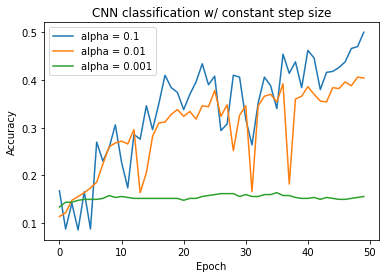

In [12]:
plt.plot(range(len(run1[0])),run1[0], label = 'alpha = 0.1')
plt.plot(range(len(run2[0])),run2[0], label = 'alpha = 0.01')
plt.plot(range(len(run3[0])),run3[0], label = 'alpha = 0.001')
plt.title('CNN classification w/ constant step size')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

Epoch 1/50
36/36 [==============================] - 3s 75ms/step - loss: 2.3343 - accuracy: 0.1262 - val_loss: 2.1363 - val_accuracy: 0.2320
Epoch 2/50
36/36 [==============================] - 2s 67ms/step - loss: 2.1041 - accuracy: 0.2424 - val_loss: 1.9323 - val_accuracy: 0.3260
Epoch 3/50
36/36 [==============================] - 2s 68ms/step - loss: 1.8828 - accuracy: 0.3412 - val_loss: 1.8041 - val_accuracy: 0.4040
Epoch 4/50
36/36 [==============================] - 3s 71ms/step - loss: 1.7181 - accuracy: 0.4166 - val_loss: 1.9427 - val_accuracy: 0.3460
Epoch 5/50
36/36 [==============================] - 3s 71ms/step - loss: 1.6967 - accuracy: 0.4138 - val_loss: 1.6780 - val_accuracy: 0.4220
Epoch 6/50
36/36 [==============================] - 2s 67ms/step - loss: 1.5784 - accuracy: 0.4586 - val_loss: 1.6258 - val_accuracy: 0.4640
Epoch 7/50
36/36 [==============================] - 2s 69ms/step - loss: 1.5245 - accuracy: 0.4666 - val_loss: 1.6055 - val_accuracy: 0.4660
Epoch 8/50
36

Text(0, 0.5, 'Accuracy')

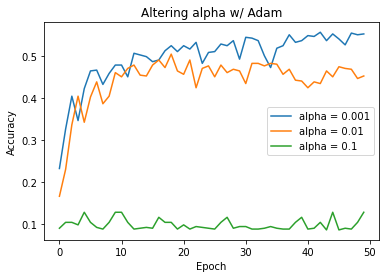

In [17]:
alpha_range = [0.001, 0.01, 0.1]
epochs = 50
plt.figure()
plt.title('Altering alpha w/ Adam')
for alph in alpha_range:
    plt.plot(range(epochs),run_experiment(make_adam_opt(alpha=alph),epochs=epochs)[0],label = f'alpha = {alph}' )
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

Epoch 1/50
36/36 [==============================] - 3s 75ms/step - loss: 2.3191 - accuracy: 0.1291 - val_loss: 2.1052 - val_accuracy: 0.2260
Epoch 2/50
36/36 [==============================] - 3s 70ms/step - loss: 2.0540 - accuracy: 0.2572 - val_loss: 2.1259 - val_accuracy: 0.2520
Epoch 3/50
36/36 [==============================] - 3s 72ms/step - loss: 1.9331 - accuracy: 0.3157 - val_loss: 1.9837 - val_accuracy: 0.2760
Epoch 4/50
36/36 [==============================] - 3s 70ms/step - loss: 1.7845 - accuracy: 0.3751 - val_loss: 1.9191 - val_accuracy: 0.3520
Epoch 5/50
36/36 [==============================] - 3s 70ms/step - loss: 1.7640 - accuracy: 0.3899 - val_loss: 1.8370 - val_accuracy: 0.3560
Epoch 6/50
36/36 [==============================] - 2s 67ms/step - loss: 1.7111 - accuracy: 0.3975 - val_loss: 1.7253 - val_accuracy: 0.4020
Epoch 7/50
36/36 [==============================] - 2s 62ms/step - loss: 1.6304 - accuracy: 0.4278 - val_loss: 1.7539 - val_accuracy: 0.4020
Epoch 8/50
36

Text(0, 0.5, 'Accuracy')

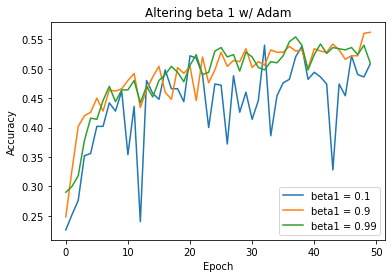

In [18]:
beta1_range = [0.1, 0.9, 0.99]
epochs = 50
plt.figure()
plt.title('Altering beta 1 w/ Adam')
for bet1 in beta1_range:
    plt.plot(range(epochs),run_experiment(make_adam_opt(beta1=bet1),epochs=epochs)[0],label = f'beta1 = {bet1}' )
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

Epoch 1/50
36/36 [==============================] - 3s 67ms/step - loss: 2.3295 - accuracy: 0.1096 - val_loss: 2.2474 - val_accuracy: 0.1660
Epoch 2/50
36/36 [==============================] - 2s 60ms/step - loss: 2.1606 - accuracy: 0.2281 - val_loss: 2.3245 - val_accuracy: 0.1620
Epoch 3/50
36/36 [==============================] - 2s 62ms/step - loss: 2.2500 - accuracy: 0.1948 - val_loss: 2.2701 - val_accuracy: 0.2300
Epoch 4/50
36/36 [==============================] - 2s 61ms/step - loss: 2.1992 - accuracy: 0.2465 - val_loss: 2.0437 - val_accuracy: 0.2840
Epoch 5/50
36/36 [==============================] - 2s 60ms/step - loss: 2.0639 - accuracy: 0.2908 - val_loss: 2.0162 - val_accuracy: 0.2920
Epoch 6/50
36/36 [==============================] - 2s 62ms/step - loss: 2.0679 - accuracy: 0.2771 - val_loss: 1.9961 - val_accuracy: 0.3020
Epoch 7/50
36/36 [==============================] - 2s 62ms/step - loss: 1.9965 - accuracy: 0.2994 - val_loss: 1.9747 - val_accuracy: 0.3040
Epoch 8/50
36

Text(0, 0.5, 'Accuracy')

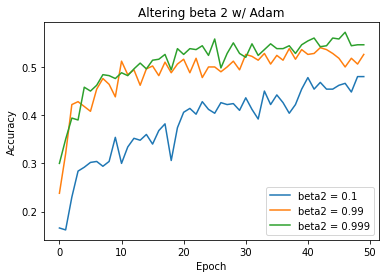

In [19]:
beta2_range = [0.1,  0.99, 0.999]
epochs = 50
plt.figure()
plt.title('Altering beta 2 w/ Adam')
for bet2 in beta2_range:
    plt.plot(range(epochs),run_experiment(make_adam_opt(beta2=bet2),epochs=epochs)[0],label = f'beta2 = {bet2}' )
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

In [21]:
# import winsound
# # Play Windows exit sound.
# winsound.PlaySound("SystemExit", winsound.SND_ALIAS)

# # Probably play Win     dows default sound, if any is registered (because
# # "*" probably isn't the registered name of any sound).
# while True:
#     winsound.PlaySound("*", winsound.SND_ALIAS)

In [22]:
adam_val_acc1, adam_val_loss1, adam_train_acc_1, adam_train_loss_1 = run_experiment(make_adam_opt(),epochs=epochs)
adam_val_acc2, adam_val_loss2, adam_train_acc_2, adam_train_loss_2 = run_experiment(make_adam_opt(),epochs=epochs)
adam_val_acc3, adam_val_loss3, adam_train_acc_3, adam_train_loss_3 = run_experiment(make_adam_opt(),epochs=epochs)

const_val_acc1, const_val_loss1, const_train_acc_1, const_train_loss_1 = run_experiment(make_const_opt(alpha=0.1),epochs=epochs)
const_val_acc2, const_val_loss2, const_train_acc_2, const_train_loss_2 = run_experiment(make_const_opt(alpha=0.1),epochs=epochs)
const_val_acc3, const_val_loss3, const_train_acc_3, const_train_loss_3 = run_experiment(make_const_opt(alpha=0.1),epochs=epochs)

Epoch 1/50
36/36 [==============================] - 4s 74ms/step - loss: 2.3244 - accuracy: 0.1228 - val_loss: 2.0215 - val_accuracy: 0.2820
Epoch 2/50
36/36 [==============================] - 2s 68ms/step - loss: 2.0291 - accuracy: 0.2824 - val_loss: 1.8584 - val_accuracy: 0.3280
Epoch 3/50
36/36 [==============================] - 3s 77ms/step - loss: 1.8554 - accuracy: 0.3516 - val_loss: 1.7195 - val_accuracy: 0.4400
Epoch 4/50
36/36 [==============================] - 3s 71ms/step - loss: 1.7157 - accuracy: 0.4016 - val_loss: 1.6413 - val_accuracy: 0.4800
Epoch 5/50
36/36 [==============================] - 2s 69ms/step - loss: 1.6685 - accuracy: 0.4210 - val_loss: 1.6295 - val_accuracy: 0.4700
Epoch 6/50
36/36 [==============================] - 2s 67ms/step - loss: 1.6086 - accuracy: 0.4264 - val_loss: 1.6482 - val_accuracy: 0.4540
Epoch 7/50
36/36 [==============================] - 2s 68ms/step - loss: 1.5493 - accuracy: 0.4537 - val_loss: 1.5966 - val_accuracy: 0.4480
Epoch 8/50
36

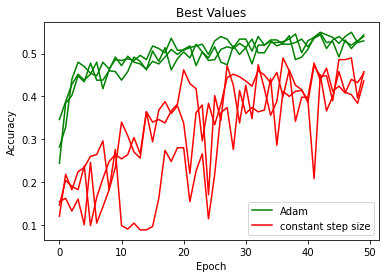

In [24]:
plt.figure()
plt.title('Best Values')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.plot(range(epochs),adam_val_acc1,'g', label = f'Adam' )
plt.plot(range(epochs),adam_val_acc2,'g' )
plt.plot(range(epochs),adam_val_acc3,'g' )

plt.plot(range(epochs),const_val_acc1,'r' ,label = f'constant step size' )
plt.plot(range(epochs),const_val_acc2 ,'r')
plt.plot(range(epochs),const_val_acc3,'r')
plt.legend()

## batch size

In [27]:
def run_experiment_w_batch(opt, epochs, batch):

    model = keras.Sequential()
    model.add(Conv2D(16, (3,3), padding='same', input_shape=x_train.shape[1:],activation='relu'))
    model.add(Conv2D(16, (3,3), strides=(2,2), padding='same', activation='relu'))
    model.add(Conv2D(32, (3,3), padding='same', activation='relu'))
    model.add(Conv2D(32, (3,3), strides=(2,2), padding='same', activation='relu'))
    model.add(Dropout(0.5))
    model.add(Flatten())
    model.add(Dense(num_classes, activation='softmax',kernel_regularizer=regularizers.l1(0.0001)))
    model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])
    # model.summary()

    batch_size = batch
    epochs = epochs
    history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)
    return history.history['val_accuracy'], history.history['val_loss'], history.history['accuracy'], history.history['loss'] 

In [28]:
batch_sizes = [32, 128, 256]

batch_adam_val_acc1, batch_adam_val_loss1, batch_adam_train_acc_1, batch_adam_train_loss_1 = run_experiment_w_batch(make_adam_opt(),epochs=epochs, batch=batch_sizes[0])
batch_adam_val_acc2, batch_adam_val_loss2, batch_adam_train_acc_2, batch_adam_train_loss_2 = run_experiment_w_batch(make_adam_opt(),epochs=epochs, batch=batch_sizes[1])
batch_adam_val_acc3, batch_adam_val_loss3, batch_adam_train_acc_3, batch_adam_train_loss_3 = run_experiment_w_batch(make_adam_opt(),epochs=epochs, batch=batch_sizes[2])



Epoch 1/50
141/141 [==============================] - 4s 23ms/step - loss: 2.2291 - accuracy: 0.1729 - val_loss: 1.8079 - val_accuracy: 0.3560
Epoch 2/50
141/141 [==============================] - 3s 20ms/step - loss: 1.8064 - accuracy: 0.3607 - val_loss: 1.6772 - val_accuracy: 0.4500
Epoch 3/50
141/141 [==============================] - 3s 22ms/step - loss: 1.6702 - accuracy: 0.4170 - val_loss: 1.6640 - val_accuracy: 0.4560
Epoch 4/50
141/141 [==============================] - 3s 23ms/step - loss: 1.5878 - accuracy: 0.4606 - val_loss: 1.6112 - val_accuracy: 0.4700
Epoch 5/50
141/141 [==============================] - 3s 22ms/step - loss: 1.5963 - accuracy: 0.4317 - val_loss: 1.6135 - val_accuracy: 0.4580
Epoch 6/50
141/141 [==============================] - 3s 22ms/step - loss: 1.4721 - accuracy: 0.4918 - val_loss: 1.5802 - val_accuracy: 0.4660
Epoch 7/50
141/141 [==============================] - 3s 22ms/step - loss: 1.4491 - accuracy: 0.5071 - val_loss: 1.5491 - val_accuracy: 0.4920

TypeError: run_experiment() got an unexpected keyword argument 'batch'

In [30]:
batch_const_val_acc1, batch_const_val_loss1, batch_const_train_acc_1, batch_const_train_loss_1 = run_experiment_w_batch(make_const_opt(alpha=0.1),epochs=epochs, batch=batch_sizes[0])
batch_const_val_acc2, batch_const_val_loss2, batch_const_train_acc_2, batch_const_train_loss_2 = run_experiment_w_batch(make_const_opt(alpha=0.1),epochs=epochs, batch=batch_sizes[0])
batch_const_val_acc3, batch_const_val_loss3, batch_const_train_acc_3, batch_const_train_loss_3 = run_experiment_w_batch(make_const_opt(alpha=0.1),epochs=epochs, batch=batch_sizes[0])

Epoch 1/50
141/141 [==============================] - 3s 20ms/step - loss: 2.3475 - accuracy: 0.1236 - val_loss: 2.2620 - val_accuracy: 0.2400
Epoch 2/50
141/141 [==============================] - 3s 18ms/step - loss: 2.2569 - accuracy: 0.1954 - val_loss: 2.2450 - val_accuracy: 0.1800
Epoch 3/50
141/141 [==============================] - 3s 19ms/step - loss: 2.2118 - accuracy: 0.2183 - val_loss: 2.0630 - val_accuracy: 0.2780
Epoch 4/50
141/141 [==============================] - 3s 19ms/step - loss: 2.1163 - accuracy: 0.2642 - val_loss: 2.0115 - val_accuracy: 0.3280
Epoch 5/50
141/141 [==============================] - 3s 21ms/step - loss: 1.9671 - accuracy: 0.3138 - val_loss: 1.9431 - val_accuracy: 0.3360
Epoch 6/50
141/141 [==============================] - 3s 21ms/step - loss: 1.8502 - accuracy: 0.3496 - val_loss: 1.8588 - val_accuracy: 0.3400
Epoch 7/50
141/141 [==============================] - 3s 20ms/step - loss: 1.7070 - accuracy: 0.4120 - val_loss: 1.6329 - val_accuracy: 0.4560

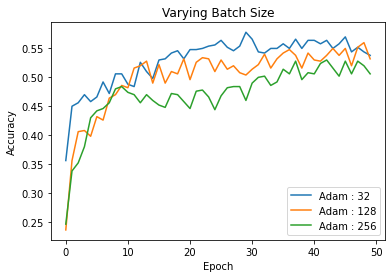

In [34]:
plt.figure()
plt.title('Varying Batch Size')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.plot(range(epochs),batch_adam_val_acc1, label = f'Adam : {batch_sizes[0]}' )
plt.plot(range(epochs),batch_adam_val_acc2,label = f'Adam : {batch_sizes[1]}' )
plt.plot(range(epochs),batch_adam_val_acc3, label = f'Adam : {batch_sizes[2]}')

plt.legend()

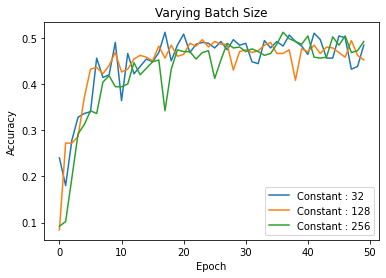

In [33]:
plt.figure()
plt.title('Varying Batch Size')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.plot(range(epochs),batch_const_val_acc1,label = f'Constant : {batch_sizes[0]}' )
plt.plot(range(epochs),batch_const_val_acc2 , label = f'Constant : {batch_sizes[1]}')
plt.plot(range(epochs),batch_const_val_acc3, label = f'Constant : {batch_sizes[2]}')
plt.legend()

get value for mean best loss, mean best accuracy and mean execution time for 30 epochs

In [37]:
#loop
import time
curr_time = time.time_ns()
acc_sum, loss_sum = 0,0
for i in range(5):
    acc, loss, train_acc, train_loss = run_experiment(make_const_opt(alpha = 0.1), 20)
    acc_sum = acc_sum + max(acc)
    loss_sum = loss_sum + min(loss)
time_taken = time.time_ns() - curr_time
acc_sum = acc_sum/5
loss_sum = loss_sum/5

curr_time = time.time_ns()
adam_acc_sum, adam_loss_sum = 0,0
for i in range(5):
    adam_acc, adam_loss, adam_train_acc, adam_train_loss = run_experiment(make_adam_opt(), 20)
    adam_acc_sum = adam_acc_sum + max(adam_acc)
    adam_loss_sum = adam_loss_sum + min(adam_loss)
adam_time_taken = time.time_ns() - curr_time
adam_acc_sum = adam_acc_sum/5
adam_loss_sum = adam_loss_sum/5

Epoch 1/20
36/36 [==============================] - 3s 75ms/step - loss: 2.3539 - accuracy: 0.1098 - val_loss: 2.3407 - val_accuracy: 0.1540
Epoch 2/20
36/36 [==============================] - 2s 63ms/step - loss: 2.3155 - accuracy: 0.1460 - val_loss: 2.3386 - val_accuracy: 0.1340
Epoch 3/20
36/36 [==============================] - 2s 60ms/step - loss: 2.3197 - accuracy: 0.1559 - val_loss: 2.3520 - val_accuracy: 0.1580
Epoch 4/20
36/36 [==============================] - 2s 55ms/step - loss: 2.3782 - accuracy: 0.1050 - val_loss: 2.3530 - val_accuracy: 0.0840
Epoch 5/20
36/36 [==============================] - 2s 58ms/step - loss: 2.3166 - accuracy: 0.1426 - val_loss: 2.3496 - val_accuracy: 0.0880
Epoch 6/20
36/36 [==============================] - 2s 59ms/step - loss: 2.2765 - accuracy: 0.1682 - val_loss: 2.3394 - val_accuracy: 0.1080
Epoch 7/20
36/36 [==============================] - 2s 61ms/step - loss: 2.2766 - accuracy: 0.1668 - val_loss: 2.2716 - val_accuracy: 0.2040
Epoch 8/20
36

In [39]:
print('loss', loss_sum,' adam_loss ',adam_loss_sum)
print('acc', acc_sum,' adam_acc ',adam_acc_sum)
print('time', time_taken/1e9,' adam_time ',adam_time_taken/1e9)

loss 1.7785475254058838  adam_loss  1.473837947845459
acc 0.38480000495910643  adam_acc  0.5248000025749207
time 249.8092071  adam_time  258.2755093
